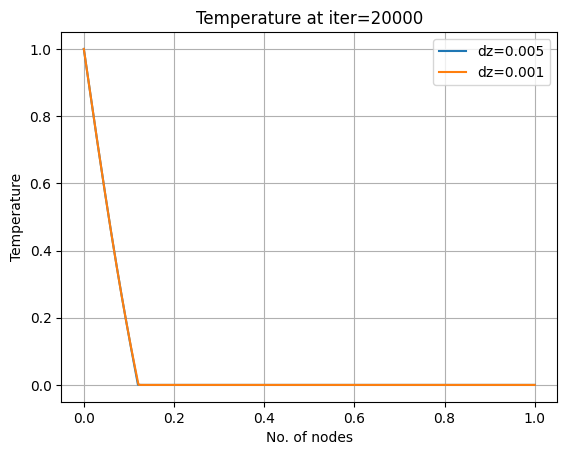

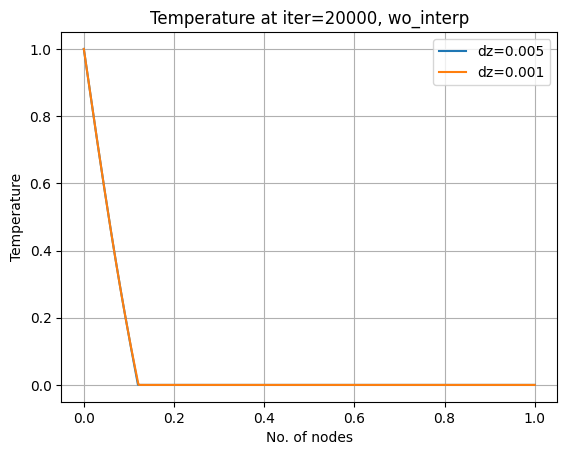

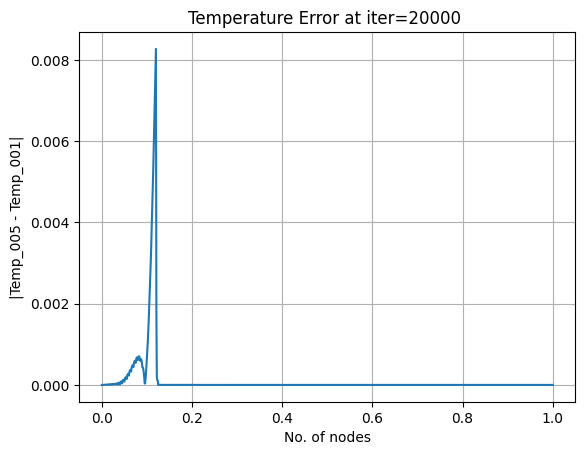

In [37]:
"""

-Comparison of results for dz 0.01, 0.005, 0.001 
by interpolating results at 0.01 and 0.005. 
-Error analysis performed with respect to dz=0.001
-Plots using one-norm, two-norm and inf-norm

"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.interpolate as interp

# distance covered by node = dz*node_number
# 1. calculate the distance travelled by nodes in the case dz=0.01
# 2. calculate the node_number for the distance travelled in the case dz=0.005 and 0.001
# 3. node_number = index; extract the temperature at this index for dz=0.001 and 0.001
# 4. compare the temperatures using error_analysis

#temp_01 = pd.read_csv("Temperature_0.01\Temperature0.01.csv", sep=',')
temp_001 = pd.read_csv("Melting Results\Temperature_0.001\Temperature0.001.csv", sep=',')
temp_005 = pd.read_csv("Melting Results\Temperature_0.005\Temperature0.005.csv", sep=',')
i = 20000
temp_001  = temp_001.drop(['Unnamed: 0'], axis=1)
temp_005 = temp_005.drop(['Unnamed: 0'], axis=1)
#temp_01_i100 = np.array(temp_01[i:i+1])
temp_005_i100 = np.array(temp_005[i:i+1])
temp_001_i100 = np.array(temp_001[i:i+1])
x_new = np.linspace(0,1,1001) #[x for x in range(temp_001_i100.shape[1])]
func_interp_005 = interp.interp1d(np.linspace(0,1,201), temp_005_i100[0], kind='linear')
#y_001 = np.interp(x_new, [x for x in range(temp_001_i100.shape[1])], temp_001_i100[0])
y_005 = np.array(func_interp_005(x_new)).reshape(1001,1) #np.interp(x_new,[x for x in range(temp_005_i100.shape[1])], temp_005_i100[0])

plt.grid()
plt.plot(x_new, y_005, label='dz=0.005')
plt.plot(x_new, temp_001_i100[0], label='dz=0.001')
plt.xlabel('No. of nodes')
plt.ylabel('Temperature')
plt.legend()
plt.title('Temperature at iter=20000')
plt.show()

plt.grid()
plt.plot(np.linspace(0,1,201), temp_005_i100[0], label='dz=0.005')
plt.plot(x_new, temp_001_i100[0], label='dz=0.001')
plt.xlabel('No. of nodes')
plt.ylabel('Temperature')
plt.legend()
plt.title('Temperature at iter=20000, wo_interp')
plt.show()

from calculate_error import error_norms
err_dz = error_norms(y_005.reshape(1,1001),temp_001_i100[0])
diff_005_001 = err_dz.numerical_analytical_diff().reshape(1001,1)
one_norm_005_001 = err_dz.one_norm(diff_005_001)
two_norm_005_001 = err_dz.two_norm(diff_005_001)

plt.grid()
plt.plot(x_new, diff_005_001)
plt.xlabel('No. of nodes')
plt.ylabel('|Temp_005 - Temp_001|')
plt.title('Temperature Error at iter=20000 ')
plt.show()


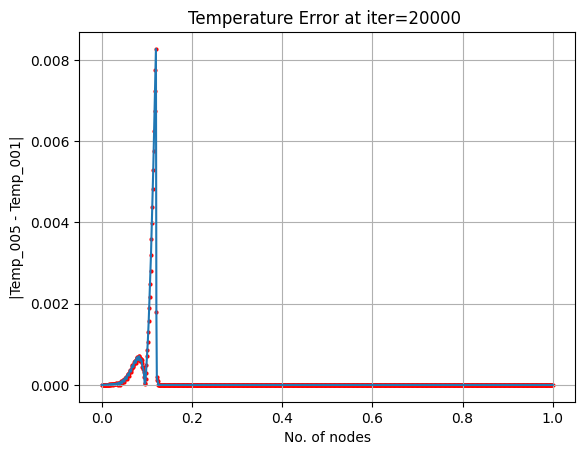

In [38]:
plt.grid()
plt.plot(x_new, diff_005_001)
plt.scatter(x_new, diff_005_001,marker=".",linewidths=0.01, c='r')
plt.xlabel('No. of nodes')
plt.ylabel('|Temp_005 - Temp_001|')
plt.title('Temperature Error at iter=20000 ')
plt.show()

In [ ]:
inf_norm_005_001 = err_dz.infinity_norm(diff_005_001)
plt.grid()
plt.plot(x_norm_array, one_norm_005_001, label='one norm')
plt.plot(x_norm_array, two_norm_005_001, label='two-norm')
plt.plot(x_norm_array, inf_norm_005_001, label='inf-norm')
plt.xlabel('No. of iterations')
plt.ylabel('|Temp_005 - Temp_001|')
plt.legend()
plt.title('Temperature Error Vs Iterations')
plt.show()

In [45]:
def interp_1d(xnew, y):
    func_interp = interp.interp1d(np.linspace(0,1,len(y)), y, kind='linear')
    return np.array(func_interp(xnew)).reshape(len(xnew),1)

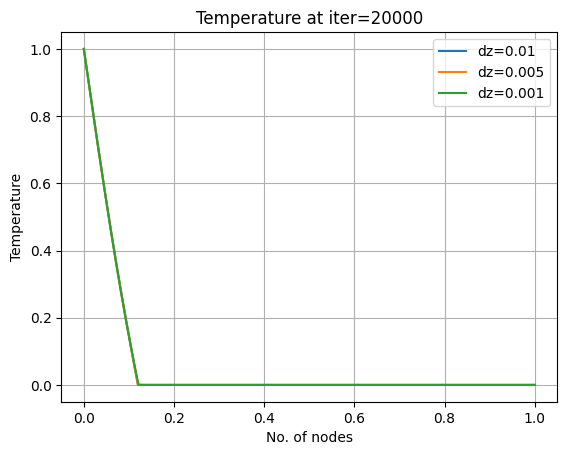

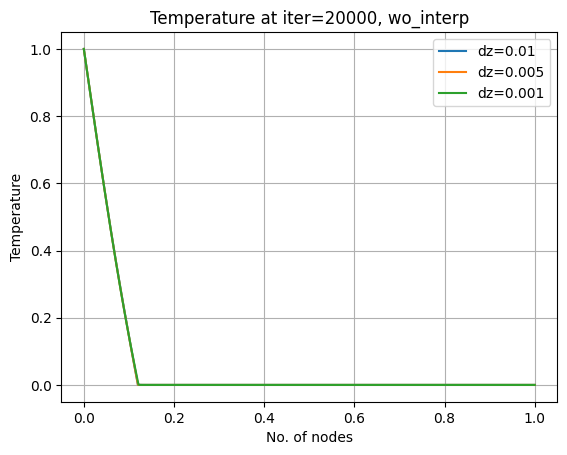

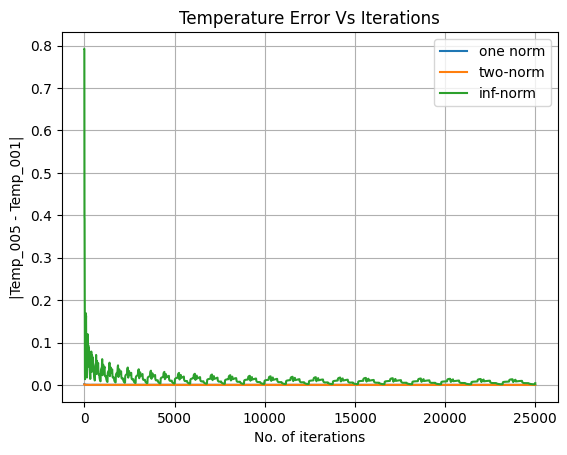

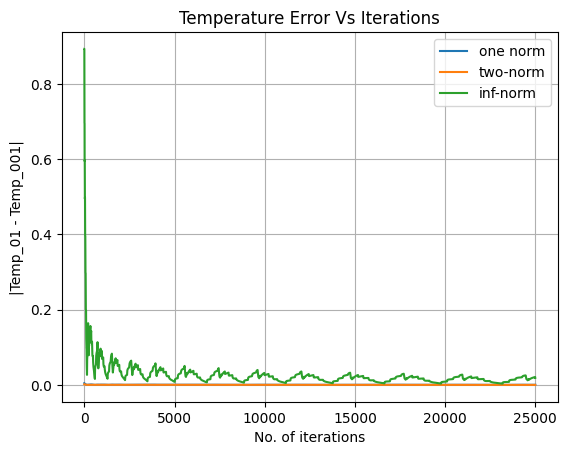

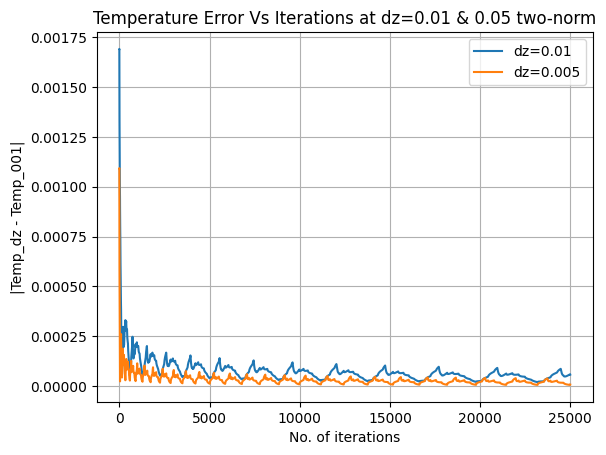

In [55]:
# distance covered by node = dz*node_number
# 1. calculate the distance travelled by nodes in the case dz=0.01
# 2. calculate the node_number for the distance travelled in the case dz=0.005 and 0.001
# 3. node_number = index; extract the temperature at this index for dz=0.001 and 0.001
# 4. compare the temperatures using error_analysis

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

temp_01 = pd.read_csv("Melting Results\Temperature_0.01_melting\Temperature0.01.csv", sep=',')
temp_001 = pd.read_csv("Melting Results\Temperature_0.001\Temperature0.001.csv", sep=',')
temp_005 = pd.read_csv("Melting Results\Temperature_0.005\Temperature0.005.csv", sep=',')
temp_01 = temp_01.drop(['Unnamed: 0'], axis=1)
temp_001  = temp_001.drop(['Unnamed: 0'], axis=1)
temp_005 = temp_005.drop(['Unnamed: 0'], axis=1)
temp_01_i100 = np.array([np.array(temp_01[i:i+1]) for i in range(24999)]).reshape(24999,101)
temp_005_i100 = np.array([np.array(temp_005[i:i+1]) for i in range(24999)]).reshape(24999,201)
temp_001_i100 = np.array([np.array(temp_001[i:i+1]) for i in range(24999)]).reshape(24999, 1001)

x_new = np.linspace(0,1,1001)

y_01 = np.array([interp_1d(x_new, temp_01_i100[i]) for i in range(24999)]).reshape(24999,1001)
y_005 = np.array([interp_1d(x_new, temp_005_i100[i]) for i in range(24999)]).reshape(24999, 1001)

iter_no = 20000
plt.grid()
plt.plot(x_new, y_01[iter_no], '--',label='dz=0.01')
plt.plot(x_new, y_005[iter_no],'.', label='dz=0.005')
plt.plot(x_new, temp_001_i100[iter_no], label='dz=0.001')
plt.xlabel('Distance in m')
plt.ylabel('Temperature')
plt.legend()
plt.title('Temperature at iter=20000')
plt.show()

plt.grid()
plt.plot(np.linspace(0,1,101), temp_01_i100[iter_no], label='dz=0.01')
plt.plot(np.linspace(0,1,201), temp_005_i100[iter_no], label='dz=0.005')
plt.plot(x_new, temp_001_i100[iter_no], label='dz=0.001')
plt.xlabel('Distance in m')
plt.ylabel('Temperature')
plt.legend()
plt.title('Temperature at iter=20000, wo_interp')
plt.show()

from calculate_error import error_norms
# error between dz_005 and dz_001
err_dz = error_norms(y_005,temp_001_i100)
diff_005_001 = err_dz.numerical_analytical_diff()
one_norm_005_001 = err_dz.one_norm(diff_005_001)
two_norm_005_001 = err_dz.two_norm(diff_005_001)
inf_norm_005_001 = err_dz.infinity_norm(diff_005_001)
# error between dz_01 and dz_001
err_dz_01_001 = error_norms(y_01, temp_001_i100)
diff_01_001 = err_dz_01_001.numerical_analytical_diff()
one_norm_01_001 = err_dz_01_001.one_norm(diff_01_001)
two_norm_01_001 = err_dz_01_001.two_norm(diff_01_001)
inf_norm_01_001 = err_dz_01_001.infinity_norm(diff_01_001)

x_norm_array = [i for i in range(24999)]

plt.grid()
plt.plot(x_norm_array, one_norm_005_001, label='one norm')
plt.plot(x_norm_array, two_norm_005_001, label='two-norm')
plt.plot(x_norm_array, inf_norm_005_001, label='inf-norm')
plt.xlabel('No. of iterations')
plt.ylabel('|Temp_005 - Temp_001|')
plt.legend()
plt.yscale('log')
plt.title('Temperature Error Vs Iterations')
plt.show()

plt.grid()
plt.plot(x_norm_array, one_norm_01_001, label='one norm')
plt.plot(x_norm_array, two_norm_01_001, label='two-norm')
plt.plot(x_norm_array, inf_norm_01_001, label='inf-norm')
plt.xlabel('No. of iterations')
plt.ylabel('|Temp_01 - Temp_001|')
plt.legend()
plt.yscale('log')
plt.title('Temperature Error Vs Iterations')
plt.show()

plt.grid()
plt.plot(x_norm_array, two_norm_01_001, label='dz=0.01')
plt.plot(x_norm_array, two_norm_005_001, label='dz=0.005')
plt.xlabel('No. of iterations')
plt.ylabel('|Temp_dz - Temp_001|')
plt.legend()
plt.yscale('log')
plt.title('Temperature Error Vs Iterations at dz=0.01 & 0.05 two-norm')
plt.show()